# Data Wrangling :  WeRateDogs 

In [125]:
# importing required libraries
import pandas as pd 
import numpy as np 
import tweepy
import requests
import datetime
import os
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1-Data Gathering

In [126]:
#Twitter archive enhanced
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [127]:
#The tweet image predictions
image_df= pd.read_csv('image-predictions.tsv', sep='\t')

- this is the steps if we use tweepy  library for tweet-json (Don't Run it)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [128]:
# Extract data from tweet-json.txt file
df_list=[]
with open("tweet-json.txt") as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)

api_df = pd.DataFrame(df_list)
api_df = api_df[['id','retweet_count','favorite_count']]
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 2-Data Assessing

In [129]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [131]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [132]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [133]:
image_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
image_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian_elkhound,0.432416,True,whippet,0.374223,True,Siberian_husky,0.032463,True
1051,713919462244790272,https://pbs.twimg.com/media/CehZ9mLWsAAsn28.jpg,1,Siberian_husky,0.463223,True,Eskimo_dog,0.389959,True,malamute,0.097963,True
316,671743150407421952,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
1145,730427201120833536,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1,Eskimo_dog,0.682082,True,Siberian_husky,0.289288,True,Staffordshire_bullterrier,0.008771,True
1031,711363825979756544,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,1,Pembroke,0.750906,True,Cardigan,0.241152,True,basenji,0.002640,True
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True
523,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,Boston_bull,0.976577,True,French_bulldog,0.014324,True,Chihuahua,0.002302,True


In [135]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [136]:
archive_df.doggo.value_counts(),archive_df.floofer.value_counts(),archive_df.pupper.value_counts(),archive_df.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [137]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [138]:
archive_df.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [139]:
archive_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [140]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
an             7
Dave           6
Milo           6
Oscar          6
Jack           6
Scout          6
Rusty          6
Leo            6
Stanley        6
Bella          6
Jax            6
Koda           6
very           5
            ... 
Rodman         1
Pavlov         1
Aubie          1
Dook           1
Rhino          1
Ike            1
Grizzie        1
Howie          1
Scott          1
Wiggles        1
Jett           1
Kathmandu      1
Combo          1
Miley          1
Bubba          1
Marty          1
Remy           1
Tove           1
Steve          1
Luther         1
Harnold        1
Gilbert        1
Bones          1
Lilli          1
Ester          1
Divine         1
Angel          1
by            

In [141]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [142]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality aspects:
- all tweets_id are integers they should be string.
- Data types(consistency issues); All timestamps are object type.
- Inconsistent representation of null values as "None" strings in the (name, doggo, floofer, pupper, puppo) columns.
- Erroneous pet names like the letter "a" and "an"
- There were retweets and replies in the dataset that we don't use them.
- Some tweets may not include any image so we should delete them.
- Non-descriptive columns’s names in the image_df dataset such as the predicted breed(p1,p2,p3)
- Incorrect values of the rating_numerator and the rating_denominator and should be as a float type not int .
- Incorrect and weird values of the rating_numerator which has a maximum of 1776. - The same holds for the rating_denominator with illogical maximum of 170.

#### Tidiness aspects:
- (doggo, floofer, pupper, puppo) columns in archive_df data frame should be in 4 columns instead of 1 column.
- (p1,p2,p3) (p1_conf,p2_conf,p3_conf),and (p1_dog ,p2_dog ,p3_dog ) coulums in image_df are in 3 columns instead of one

### 3-Cleaing Data

- make copies form data to clean it.

In [143]:
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df.copy()

#### Define

1-Convert tweets_id to string type.

#### Code

In [144]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].apply(str)


In [145]:
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].apply(str)

In [146]:
api_df_clean = api_df_clean.rename(columns={'id':'tweet_id'})

In [147]:
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].apply(str)

#### Test

In [148]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [149]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [150]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define
2-Convert time stamp to datetime data type

#### Code

In [151]:
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)


#### Test

In [152]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### Define
3- Clean "None" strings in the (name, doggo, floofer, pupper, puppo) columns.


#### Code

In [153]:
archive_df_clean['name'] = archive_df_clean['name'].replace('None' , '')
archive_df_clean['doggo'] = archive_df_clean['doggo'].replace('None' , '')
archive_df_clean['floofer'] = archive_df_clean['floofer'].replace('None' , '')
archive_df_clean['pupper'] = archive_df_clean['pupper'].replace('None' , '')
archive_df_clean['puppo'] = archive_df_clean['puppo'].replace('None' , '')

#### Test

In [154]:
archive_df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### Define
4- Extract the correct names for ('a','an') if they existed 

#### Code

In [155]:
pattern = re.compile(r'(?<=named\s)\w+')
for index, row in archive_df_clean.iterrows():
    if row['name'] == "a" or row["name"] == "an":
        try:
            c_name = re.findall(pattern,row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('a', c_name)
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('an', c_name)
        except IndexError:
            archive_df_clean.loc[index,'name'] = np.nan
            archive_df_clean.loc[index,'name'] = np.nan

#### Test

In [156]:
archive_df_clean.name.value_counts()

             745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
Bailey         7
Toby           7
Milo           6
Rusty          6
Leo            6
Jax            6
Scout          6
Dave           6
Koda           6
Oscar          6
Jack           6
Stanley        6
Bella          6
Louis          5
Bentley        5
very           5
            ... 
Pavlov         1
Aubie          1
Dook           1
Rhino          1
Chuk           1
Ike            1
Andy           1
Grizzie        1
Scott          1
Howie          1
Wiggles        1
Kathmandu      1
Combo          1
Miley          1
Bubba          1
Marty          1
Remy           1
Tove           1
Steve          1
Luther         1
Harnold        1
Gilbert        1
Bones          1
Lilli          1
Ester          1
Divine         1
Angel          1
by            

#### Define
5- Remove retweets and replies in the dataset that we don't use them.

#### Code

In [157]:
archive_df_clean.drop(archive_df_clean[archive_df_clean['in_reply_to_status_id'] .notnull()].index, inplace = True) 
archive_df_clean.drop(archive_df_clean[archive_df_clean['retweeted_status_id'] .notnull()].index, inplace = True) 
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2056 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [158]:
archive_df_clean =archive_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [159]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2056 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Define
6-Delete tweets without images.

#### Code

In [160]:
archive_df_clean= archive_df_clean[archive_df_clean['expanded_urls'].notna()]


#### Test

In [161]:
archive_df_clean.expanded_urls.isna().sum()

0

In [162]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2053 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### Define
7-Remane the columns in image_df suach as the prediction breed(p1,p2,p3).

#### Code

In [163]:
cols = ['tweet_id', 'jpg_url', 'img_num', 'breed_1', 'confidence_1', 'prediction_1','breed_2', 'confidence_2', 'prediction_2','breed_3', 'confidence_3', 'prediction_3']
image_df_clean.columns = cols


#### Test

In [164]:
image_df_clean.head(5)

,tweet_id,jpg_url,img_num,breed_1,confidence_1,prediction_1,breed_2,confidence_2,prediction_2,breed_3,confidence_3,prediction_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define 
8- Extract the right values for rating_numerator and rating_denominator as a float type.

#### Code

In [165]:
archive_df_clean['rating_numerator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
archive_df_clean['rating_denominator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

#### Test

In [166]:
archive_df_clean.rating_numerator.value_counts()

12.00      485
10.00      434
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

In [167]:
archive_df_clean.rating_denominator.value_counts()

12.00      485
10.00      434
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_denominator, dtype: int64

#### Define
9- Gathering all dog breed in one column.

#### Code

In [168]:
archive_df_clean['breed']= archive_df_clean['doggo']+ archive_df_clean['floofer']+archive_df_clean['pupper']+archive_df_clean['puppo']

In [169]:
archive_df_clean=archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [170]:
archive_df_clean['breed'] =archive_df_clean['breed'].replace('', np.nan)
archive_df_clean['name'] =archive_df_clean['name'].replace('', np.nan)


In [171]:
archive_df_clean.loc[archive_df_clean.breed == 'doggopupper', 'breed'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.breed == 'doggopuppo', 'breed'] = 'doggo-puppo'
archive_df_clean.loc[archive_df_clean.breed == 'doggofloofer', 'breed'] = 'doggo-floofer'

#### Test

In [172]:
archive_df_clean.breed.value_counts(dropna = False)

NaN              1759
pupper            220
doggo              72
puppo              23
floofer             9
doggo-pupper        9
doggo-puppo         1
doggo-floofer       1
Name: breed, dtype: int64

In [173]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,NaN


#### Define
10-Reshape(p1,p2,p3) (p1_conf,p2_conf,p3_conf),and (p1_dog ,p2_dog ,p3_dog ) to be in one column.

#### Code

In [174]:
image_df_clean = pd.wide_to_long(image_df_clean, stubnames=['prediction', 'confidence', 'breed'],i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [175]:
image_df_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,True,0.465074,Welsh_springer_spaniel
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,True,0.156665,collie
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,True,0.061428,Shetland_sheepdog
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,True,0.506826,redbone
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,True,0.074192,miniature_pinscher


In [176]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null object
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_level    6225 non-null int64
prediction          6225 non-null bool
confidence          6225 non-null float64
breed               6225 non-null object
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


In [177]:
image_df_clean = image_df_clean.drop_duplicates(subset='tweet_id', keep="first")


In [178]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 6222
Data columns (total 7 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
prediction_level    2075 non-null int64
prediction          2075 non-null bool
confidence          2075 non-null float64
breed               2075 non-null object
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 115.5+ KB


### Analysis & Visualization

In [179]:
breed_retweet=pd.merge(api_df_clean, image_df_clean, on='tweet_id')

In [180]:
breed_retweet.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,False,0.097049,orange
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,True,0.323581,Chihuahua
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,True,0.716012,Chihuahua
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,False,0.170278,paper_towel
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,True,0.555712,basset


In [181]:
breed_retweet.prediction.value_counts()

True     1531
False     542
Name: prediction, dtype: int64

In [182]:
breed_retweet = breed_retweet.loc[(breed_retweet['prediction'] == True)]

In [183]:
breed_retweet.head()

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,True,0.323581,Chihuahua
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,True,0.716012,Chihuahua
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,True,0.555712,basset
5,891087950875897856,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,True,0.425595,Chesapeake_Bay_retriever
6,890971913173991426,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1,True,0.341703,Appenzeller


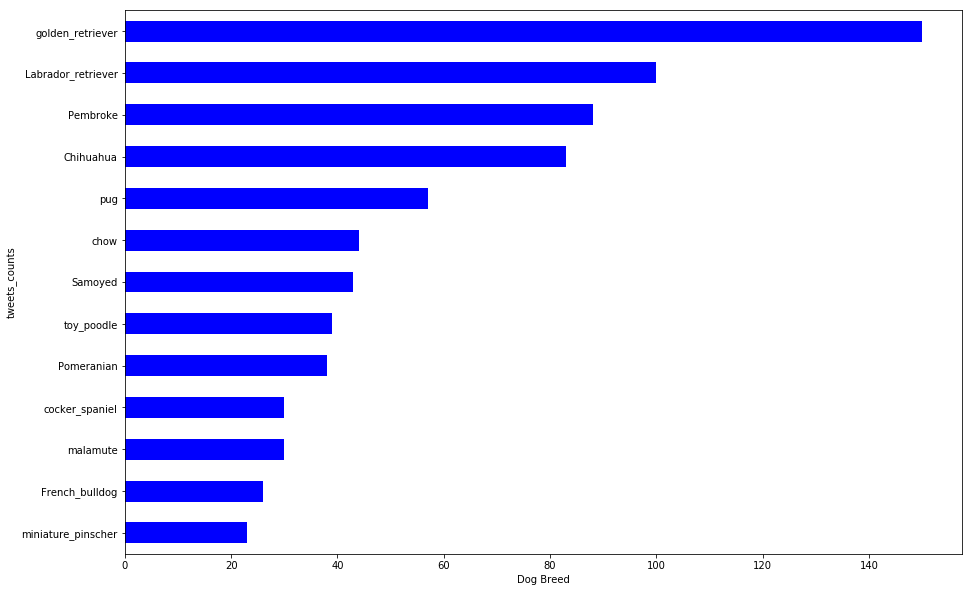

In [184]:
breed_retweet[breed_retweet.prediction].breed.value_counts()[12::-1].plot(kind='barh',figsize=(15,10),color='blue')
plt.xlabel('Dog Breed')
plt.ylabel('tweets_counts')
plt.savefig('Top_Breeds_Distribution.png')


#### This is The top dogs breed frequent in the tweets 

In [185]:
breed_retweet[breed_retweet.prediction].groupby(['breed']).favorite_count.mean().sort_values(ascending=False)

breed
Saluki                         24060.000000
French_bulldog                 17913.000000
black-and-tan_coonhound        17012.000000
flat-coated_retriever          16791.625000
Irish_water_spaniel            16400.000000
Leonberg                       14934.333333
English_springer               14091.500000
basset                         13866.000000
standard_poodle                13812.750000
Cardigan                       13699.315789
Border_terrier                 13578.000000
Bedlington_terrier             13025.000000
Afghan_hound                   12995.000000
Great_Pyrenees                 12932.000000
Mexican_hairless               12640.500000
Samoyed                        12627.697674
giant_schnauzer                12442.000000
Lakeland_terrier               12193.647059
Eskimo_dog                     12001.555556
Weimaraner                     11982.750000
golden_retriever               11310.846667
Pembroke                       11304.034091
Labrador_retriever        

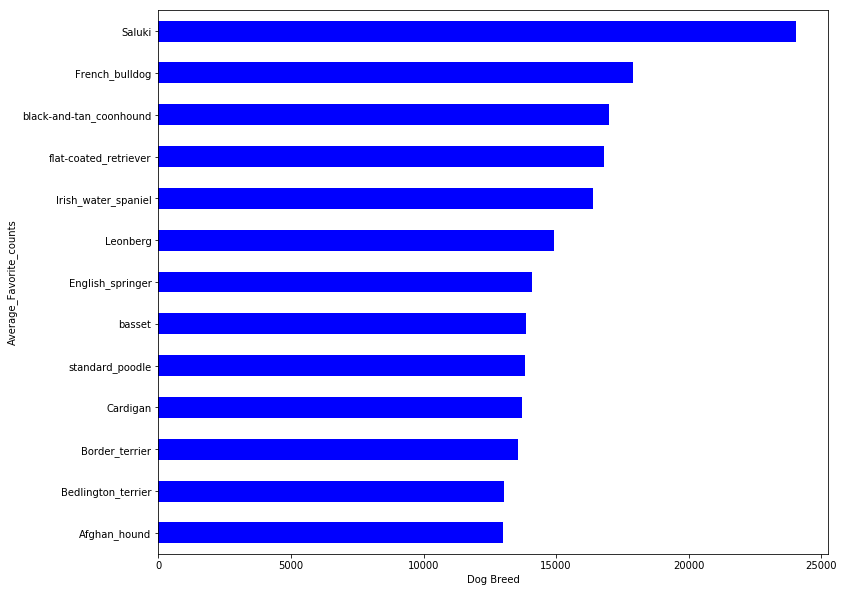

In [186]:
breed_retweet[breed_retweet.prediction].groupby(['breed']).favorite_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh',figsize=(12,10),color='blue')
plt.xlabel('Dog Breed')
plt.ylabel('Average_Favorite_counts')
plt.savefig('Top_Breeds_Average_Favorite_count.png')


#### This is The top dogs breed ranking in terms of generating favorites

In [187]:
breed_retweet[breed_retweet.prediction].groupby(['breed']).retweet_count.mean().sort_values(ascending=False)

breed
standard_poodle                11081.375000
Afghan_hound                    7162.750000
English_springer                5591.500000
Tibetan_mastiff                 5335.800000
Saluki                          5133.750000
Cardigan                        5123.105263
Samoyed                         4940.418605
Eskimo_dog                      4768.888889
Great_Pyrenees                  4732.285714
Lakeland_terrier                4729.823529
French_bulldog                  4683.923077
flat-coated_retriever           4520.250000
Irish_water_spaniel             4500.666667
Labrador_retriever              4273.430000
black-and-tan_coonhound         4164.500000
cocker_spaniel                  4097.966667
Norwegian_elkhound              3906.250000
golden_retriever                3874.466667
Mexican_hairless                3865.250000
Leonberg                        3863.666667
giant_schnauzer                 3849.333333
Chihuahua                       3665.277108
Border_terrier            

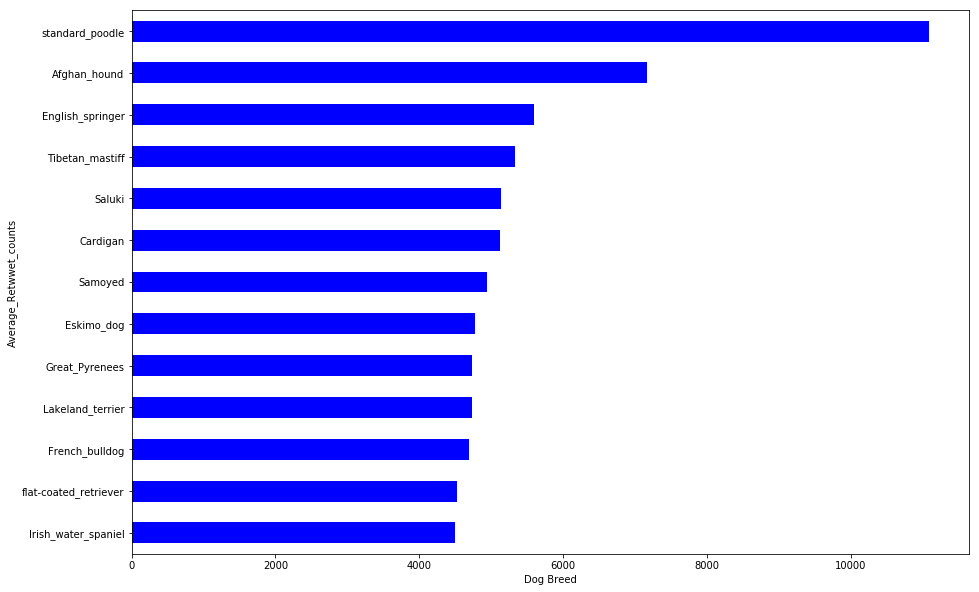

In [188]:
breed_retweet[breed_retweet.prediction].groupby(['breed']).retweet_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh',figsize=(15,10),color='blue')
plt.xlabel('Dog Breed')
plt.ylabel('Average_Retwwet_counts')
plt.savefig('Top_Breeds_Average_Retweet_count.png')

#### This is The top dogs breed ranking as per the retweets they had .

In [189]:
archive_df_clean.to_csv('twitter_archive_master.csv',index=False)
image_df_clean.to_csv('twitter_archive_master2.csv',index=False)
api_df_clean.to_csv('twitter_archive_master3.csv',index=False)


In [191]:
breed_retweet.to_csv('twitter_archive_master4.csv',index=False)